# Tutorial de GraphRAG com base no LLM Graph Transformer

Notebooks desenvolvido com base nos links abaixo:
- [How to construct knowledge graphs](https://python.langchain.com/docs/how_to/graph_constructing/)
- [Building Knowledge Graphs with LLM Graph Transformer](https://medium.com/data-science/building-knowledge-graphs-with-llm-graph-transformer-a91045c49b59)
- [llm_graph_transformer_in_depth.ipynb](https://github.com/tomasonjo/blogs/blob/master/llm/llm_graph_transformer_in_depth.ipynb)


Materiais úteis:
- [Graph Database vs Relational Database](https://memgraph.com/blog/graph-database-vs-relational-database)
- [Tutorial GraphRAG using Langchain and Oracle Graph on Oracle Database 23ai (Part 1)](https://medium.com/oracledevs/graphrag-using-langchain-and-oracle-graph-on-oracle-database-23ai-part-1-dc76b48a4ca1)
- [Implementing Knowledge Graphs with MongoDB](https://pureinsights.com/blog/2023/implementing-knowledge-graphs-with-mongodb/)
- [RAG over Structured Data (Graph & Relational)](https://victormorgante.medium.com/rag-over-structured-data-graph-relational-86d39a241270)
- [Using a Knowledge Graph to Implement a RAG Applicatio](https://www.datacamp.com/tutorial/knowledge-graph-rag)
- [Constructing knowledge graphs from text using OpenAI functions](https://bratanic-tomaz.medium.com/constructing-knowledge-graphs-from-text-using-openai-functions-096a6d010c17)
- [Day 10: Knowledge Graphs for RAG](https://blog.gopenai.com/day-10-knowledge-graphs-for-rag-8ca1691b56e2)

- [mongodb-graph](https://github.com/ranfysvalle02/mongodb-graph)

https://www.mongodb.com/developer/products/atlas/parent-doc-retrieval/

https://medium.com/mongodb/knowledge-graph-rag-using-mongodb-1346e953064c

## Imports e carregamento de variáveis de ambiente

In [ ]:
from src.settings import BASE_DIR, SQLITE_DB_NAME, MONGO_URI, MONGO_DB_NAME, MONGO_COLLECTION
from src.utils.dataviz import plot_graph_documents

## Extraindo documentos baseados em grafos de um texto com ajuda do LLMGraphTransformer

In [ ]:
from langchain_core.documents import Document

text = """
Marie Curie, 7 November 1867 – 4 July 1934, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.
She was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.
Her husband, Pierre Curie, was a co-winner of her first Nobel Prize, making them the first-ever married couple to win the Nobel Prize and launching the Curie family legacy of five Nobel Prizes.
She was, in 1906, the first woman to become a professor at the University of Paris.
Also, Robin Williams.
"""
documents = [Document(page_content=text)]

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_experimental.graph_transformers import LLMGraphTransformer

model="gpt-4o-mini"
llm = ChatOpenAI(model=model)

[GraphDocument(nodes=[Node(id='Marie Curie', type='Person', properties={}), Node(id='Pierre Curie', type='Person', properties={}), Node(id='University Of Paris', type='Institution', properties={}), Node(id='Nobel Prize', type='Award', properties={}), Node(id='Robin Williams', type='Person', properties={})], relationships=[Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Nobel Prize', type='Award', properties={}), type='WINNER', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Pierre Curie', type='Person', properties={}), type='MARRIED_TO', properties={}), Relationship(source=Node(id='Pierre Curie', type='Person', properties={}), target=Node(id='Nobel Prize', type='Award', properties={}), type='WINNER', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='University Of Paris', type='Institution', properties={}), type='PROFESSOR', properti

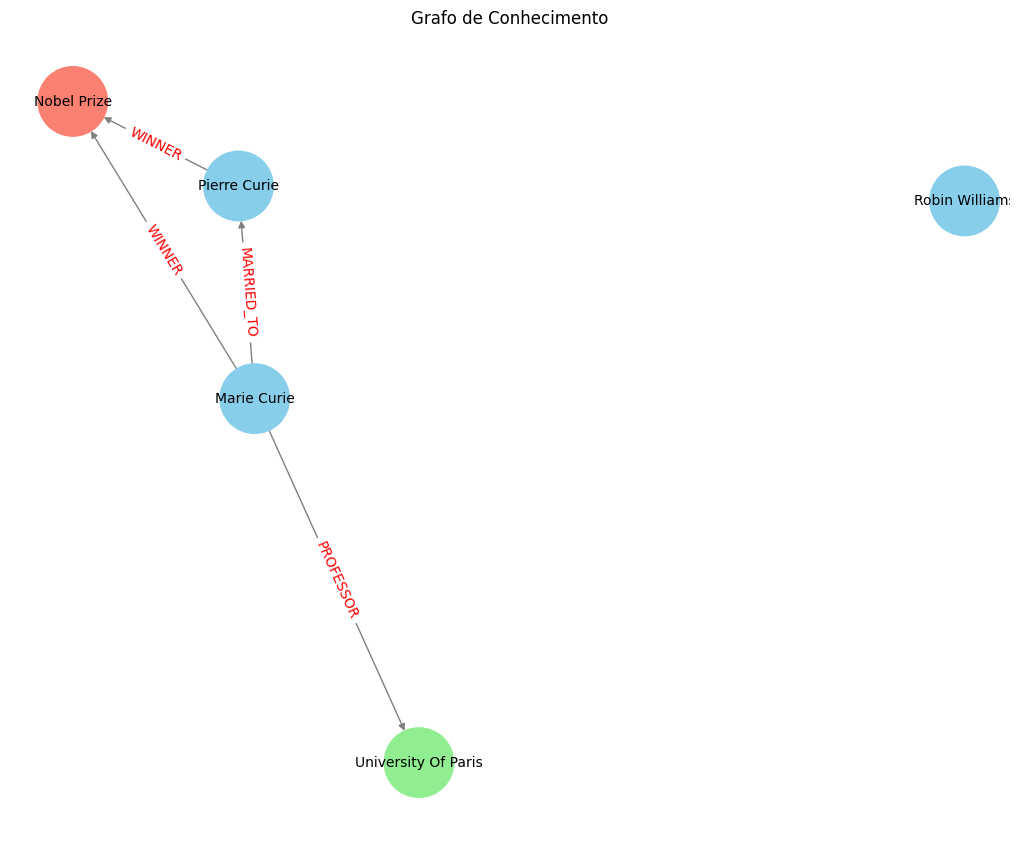

In [ ]:

no_schema = LLMGraphTransformer(llm=llm)
data = await no_schema.aconvert_to_graph_documents(documents)

print(data)
plot_graph_documents(data)

### Utlizando engenharia de prompt

[GraphDocument(nodes=[Node(id='Marie Curie', type='Person', properties={}), Node(id='Pierre Curie', type='Person', properties={}), Node(id='University Of Paris', type='Organization', properties={}), Node(id='Nobel Prize', type='Award', properties={}), Node(id='Radioactivity', type='Concept', properties={}), Node(id='Robin Williams', type='Person', properties={})], relationships=[Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Pierre Curie', type='Person', properties={}), type='HUSBAND', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Nobel Prize', type='Award', properties={}), type='WINNER', properties={}), Relationship(source=Node(id='Pierre Curie', type='Person', properties={}), target=Node(id='Nobel Prize', type='Award', properties={}), type='CO-WINNER', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='University Of Paris', type

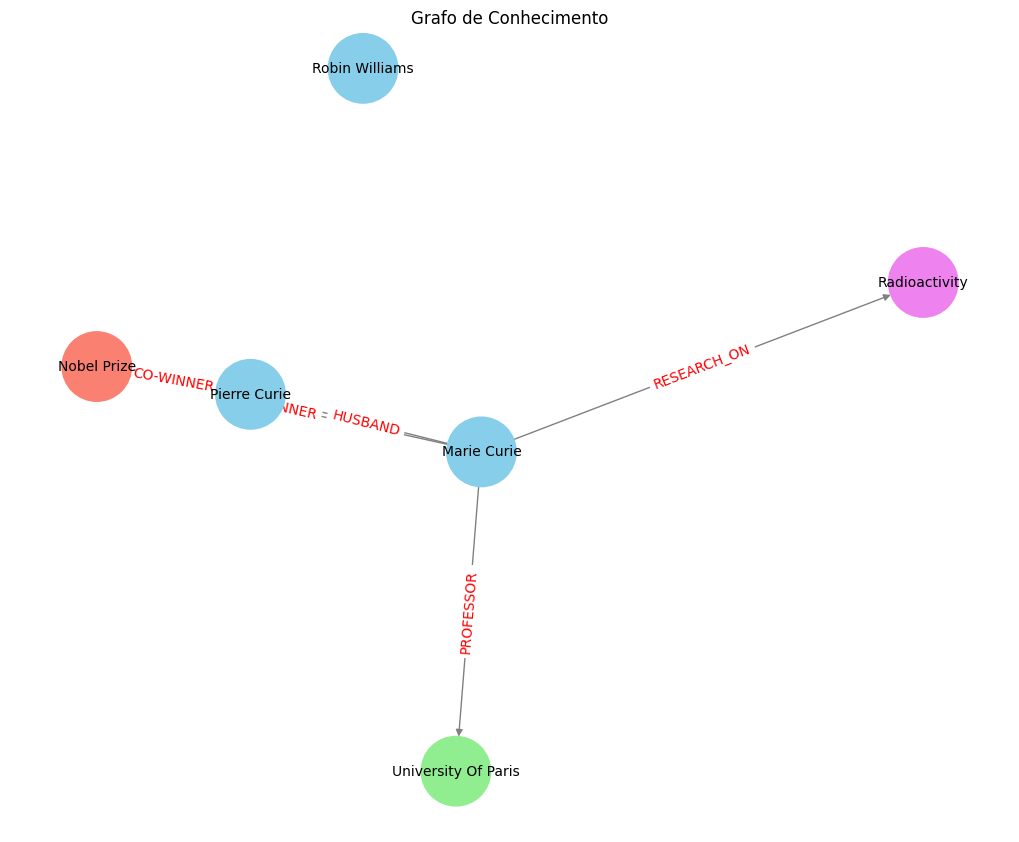

In [ ]:
no_schema_prompt = LLMGraphTransformer(llm=llm, ignore_tool_usage=True)
data = await no_schema.aconvert_to_graph_documents(documents)

print(data)
plot_graph_documents(data)

### Definir regras para a criação dos grafos

Definindo lista de nós existentes

[GraphDocument(nodes=[Node(id='Marie Curie', type='Person', properties={}), Node(id='Pierre Curie', type='Person', properties={}), Node(id='University Of Paris', type='Organization', properties={})], relationships=[Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Pierre Curie', type='Person', properties={}), type='MARRIED_TO', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='University Of Paris', type='Organization', properties={}), type='PROFESSOR', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Nobel Prize', type='Award', properties={}), type='WINNER', properties={}), Relationship(source=Node(id='Pierre Curie', type='Person', properties={}), target=Node(id='Nobel Prize', type='Award', properties={}), type='WINNER', properties={})], source=Document(metadata={}, page_content='\nMarie Curie, 7 November 1867 – 4 July 1934, was a Poli

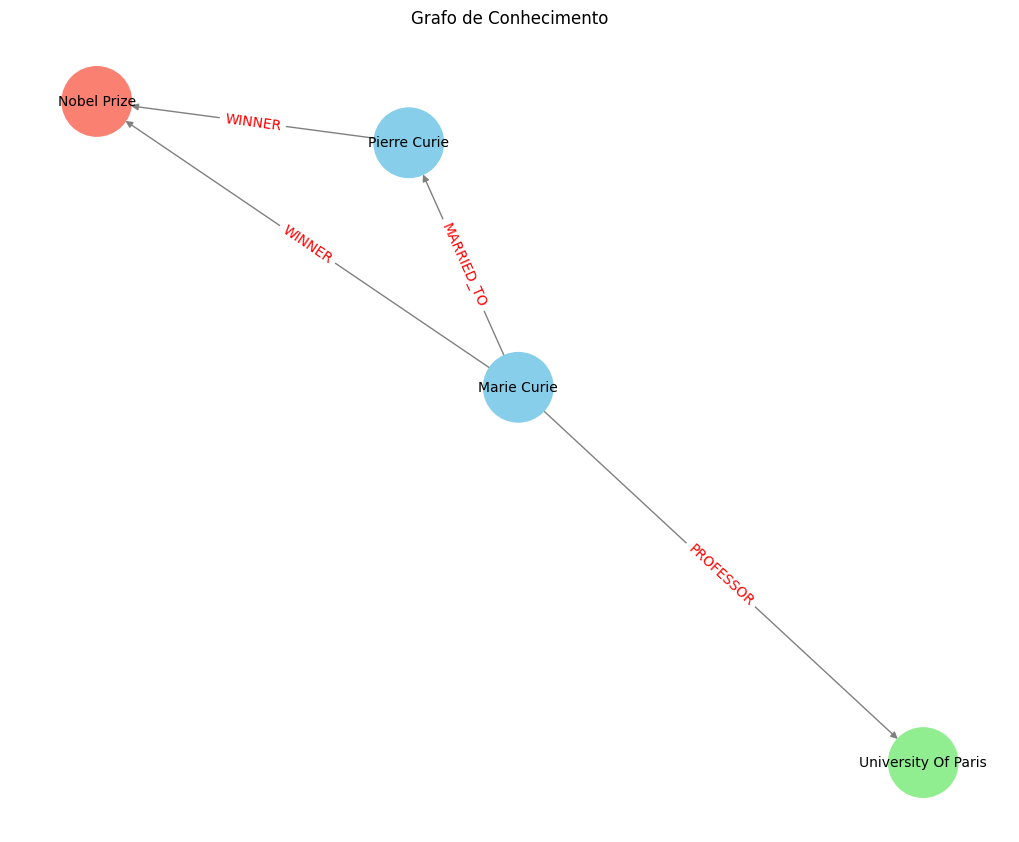

In [ ]:
allowed_nodes = ["Person", "Organization", "Location", "Award", "ResearchField"]
nodes_defined = LLMGraphTransformer(llm=llm, allowed_nodes=allowed_nodes)
data = await nodes_defined.aconvert_to_graph_documents(documents)

print(data)
plot_graph_documents(data)

Incluindo lista de relacionamentos existentes

[GraphDocument(nodes=[Node(id='Marie Curie', type='Person', properties={}), Node(id='Pierre Curie', type='Person', properties={}), Node(id='University Of Paris', type='Organization', properties={}), Node(id='Nobel Prize', type='Award', properties={})], relationships=[Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Pierre Curie', type='Person', properties={}), type='SPOUSE', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Nobel Prize', type='Award', properties={}), type='AWARD', properties={}), Relationship(source=Node(id='Pierre Curie', type='Person', properties={}), target=Node(id='Nobel Prize', type='Award', properties={}), type='AWARD', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='University Of Paris', type='Organization', properties={}), type='WORKS_AT', properties={})], source=Document(metadata={}, page_content='\nMarie Cu

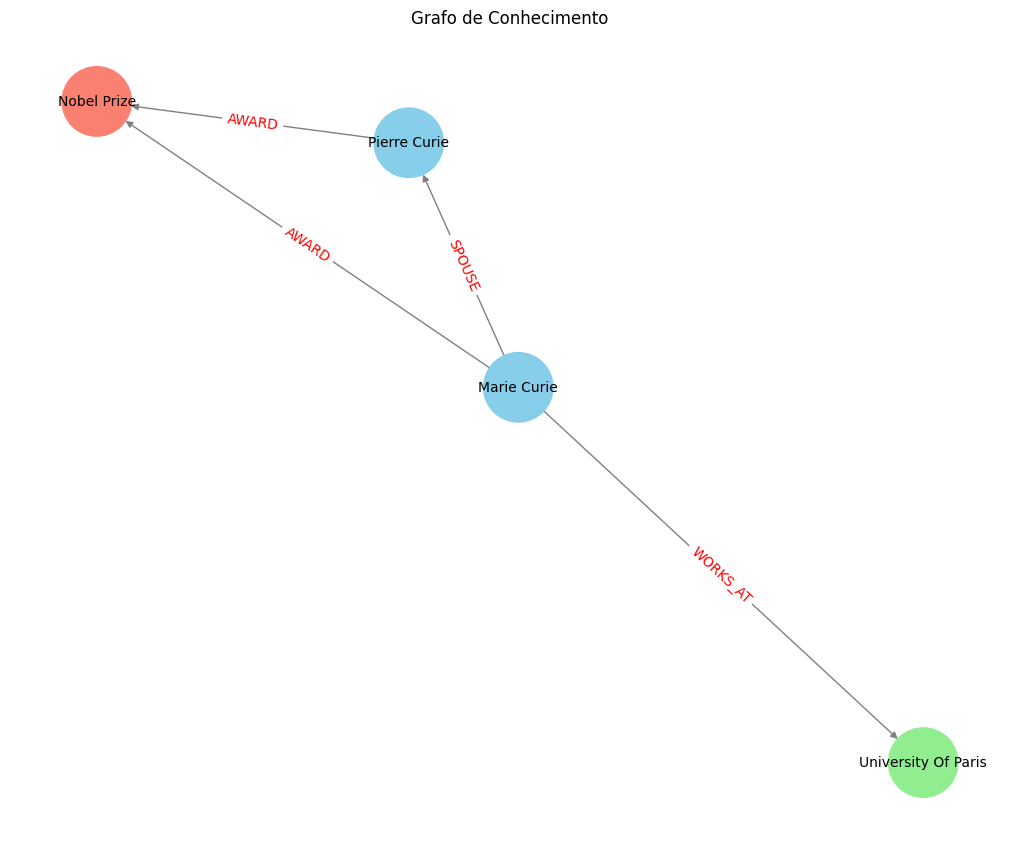

In [ ]:
allowed_nodes = ["Person", "Organization", "Location", "Award", "ResearchField"]
allowed_relationships = ["SPOUSE", "AWARD", "FIELD_OF_RESEARCH", "WORKS_AT", "IN_LOCATION"]
rels_defined = LLMGraphTransformer(
  llm=llm, 
  allowed_nodes=allowed_nodes,
  allowed_relationships=allowed_relationships
)
data = await rels_defined.aconvert_to_graph_documents(documents)


print(data)
plot_graph_documents(data)

Incluindo regras que definem a forma com que os nós se relacionam

[GraphDocument(nodes=[Node(id='Marie Curie', type='Person', properties={}), Node(id='Pierre Curie', type='Person', properties={}), Node(id='University Of Paris', type='Organization', properties={}), Node(id='Nobel Prize', type='Award', properties={})], relationships=[Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Pierre Curie', type='Person', properties={}), type='SPOUSE', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Nobel Prize', type='Award', properties={}), type='AWARD', properties={}), Relationship(source=Node(id='Pierre Curie', type='Person', properties={}), target=Node(id='Nobel Prize', type='Award', properties={}), type='AWARD', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='University Of Paris', type='Organization', properties={}), type='WORKS_AT', properties={})], source=Document(metadata={}, page_content='\nMarie Cu

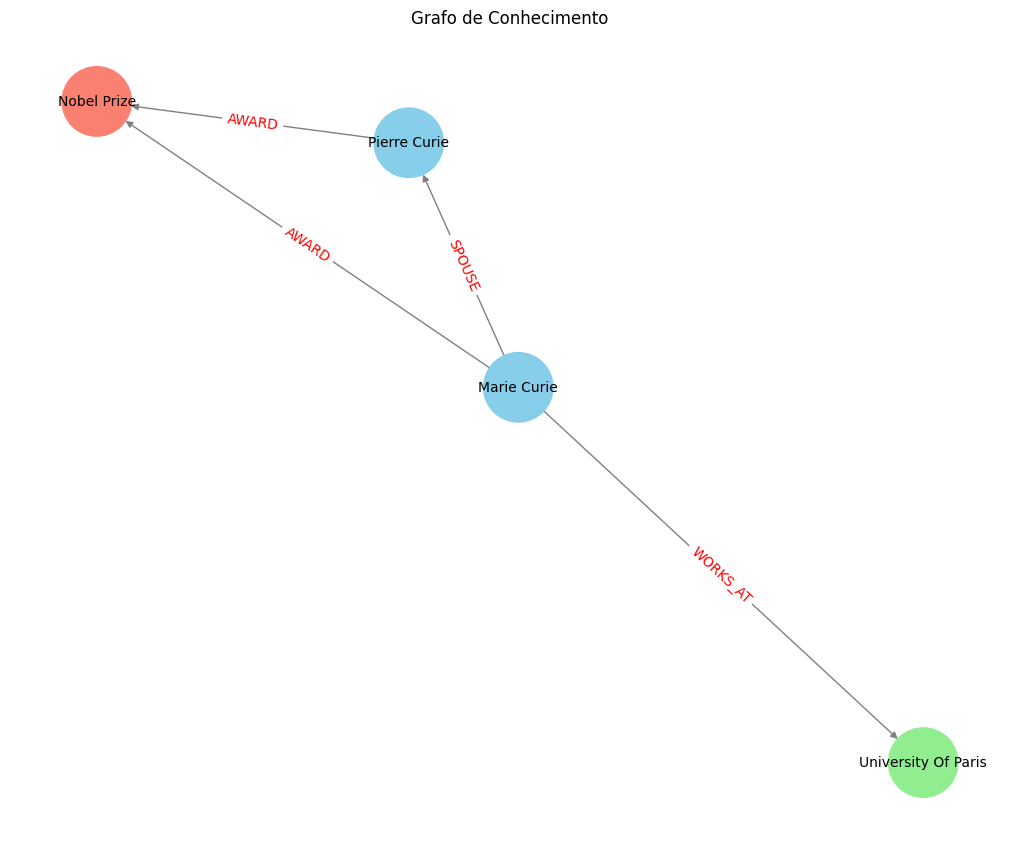

In [ ]:
allowed_nodes = ["Person", "Organization", "Location", "Award", "ResearchField"]
allowed_relationships = [
    ("Person", "SPOUSE", "Person"),
    ("Person", "AWARD", "Award"),
    ("Person", "WORKS_AT", "Organization"),
    ("Organization", "IN_LOCATION", "Location"),
    ("Person", "FIELD_OF_RESEARCH", "ResearchField")
]
rels_defined = LLMGraphTransformer(
  llm=llm, 
  allowed_nodes=allowed_nodes,
  allowed_relationships=allowed_relationships
)
data = await rels_defined.aconvert_to_graph_documents(documents)

print(data)
plot_graph_documents(data)

Incluindo permissão para o modelo identificar as propriedades de cada nó

[GraphDocument(nodes=[Node(id='Marie Curie', type='Person', properties={'date_of_birth': '1867-11-07', 'date_of_death': '1934-07-04', 'nationality': 'naturalised-French', 'field_of_study': 'chemistry', 'notable_achievement': 'only person to win a Nobel Prize in two scientific fields'}), Node(id='Pierre Curie', type='Person', properties={'relationship': 'husband', 'notable_achievement': 'co-winner of first Nobel Prize with Marie Curie'}), Node(id='University Of Paris', type='Organization', properties={'notable_achievement': 'first woman to become a professor in 1906'}), Node(id='Robin Williams', type='Person', properties={}), Node(id='Curie Family', type='Organization', properties={'notable_achievement': 'five Nobel Prizes'})], relationships=[Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Pierre Curie', type='Person', properties={}), type='SPOUSE', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=

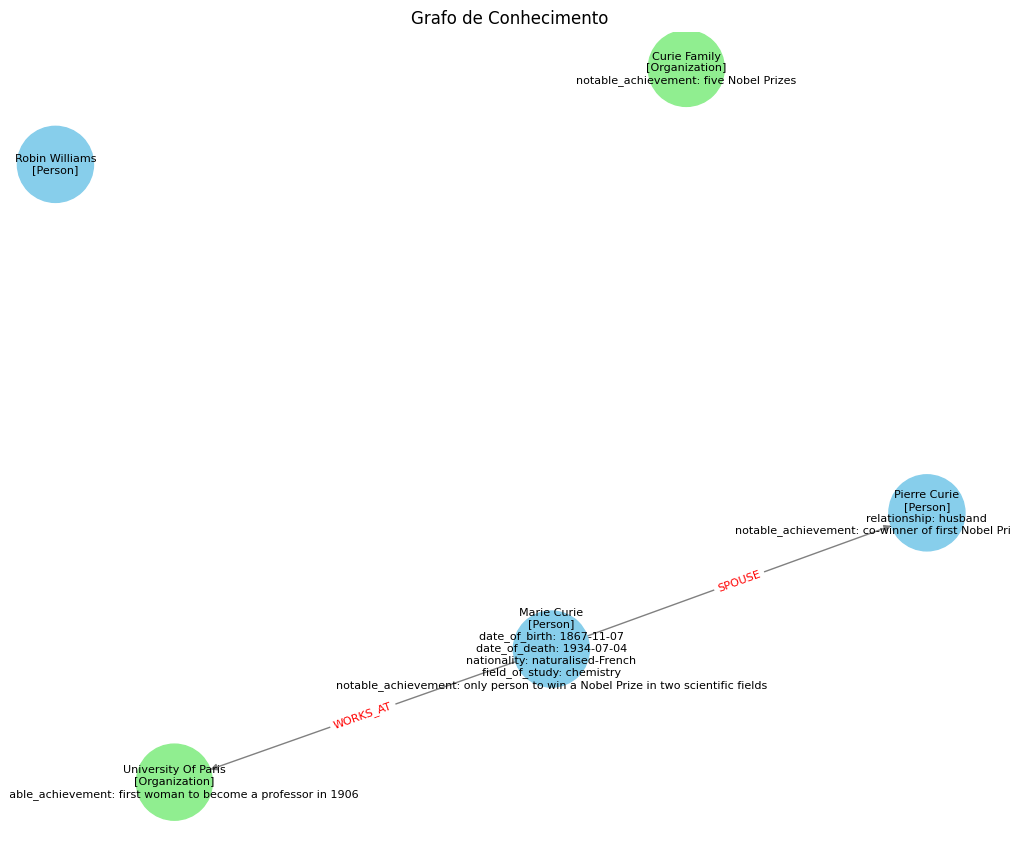

In [ ]:
allowed_nodes = ["Person", "Organization", "Location", "Award", "ResearchField"]
allowed_relationships = [
    ("Person", "SPOUSE", "Person"),
    ("Person", "AWARD", "Award"),
    ("Person", "WORKS_AT", "Organization"),
    ("Organization", "IN_LOCATION", "Location"),
    ("Person", "FIELD_OF_RESEARCH", "ResearchField")
]
node_properties=True
relationship_properties=True
props_defined = LLMGraphTransformer(
  llm=llm, 
  allowed_nodes=allowed_nodes,
  allowed_relationships=allowed_relationships,
  node_properties=node_properties,
  relationship_properties=relationship_properties
)
data = await props_defined.aconvert_to_graph_documents(documents)
# graph.add_graph_documents(data) # conexão do Neo4jGraph

print(data)
plot_graph_documents(data, show_node_properties=True)

Incluindo as propriedas para os nós manualmente

[GraphDocument(nodes=[Node(id='Marie Curie', type='Person', properties={'birth_date': '1867-11-07', 'death_date': '1934-07-04'}), Node(id='Pierre Curie', type='Person', properties={}), Node(id='University Of Paris', type='Organization', properties={}), Node(id='Nobel Prize', type='Award', properties={})], relationships=[Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Nobel Prize', type='Award', properties={}), type='AWARD', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Pierre Curie', type='Person', properties={}), type='SPOUSE', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='University Of Paris', type='Organization', properties={}), type='WORKS_AT', properties={'start_date': '1906-01-01'})], source=Document(metadata={}, page_content='\nMarie Curie, 7 November 1867 – 4 July 1934, was a Polish and naturalised-French physicist and

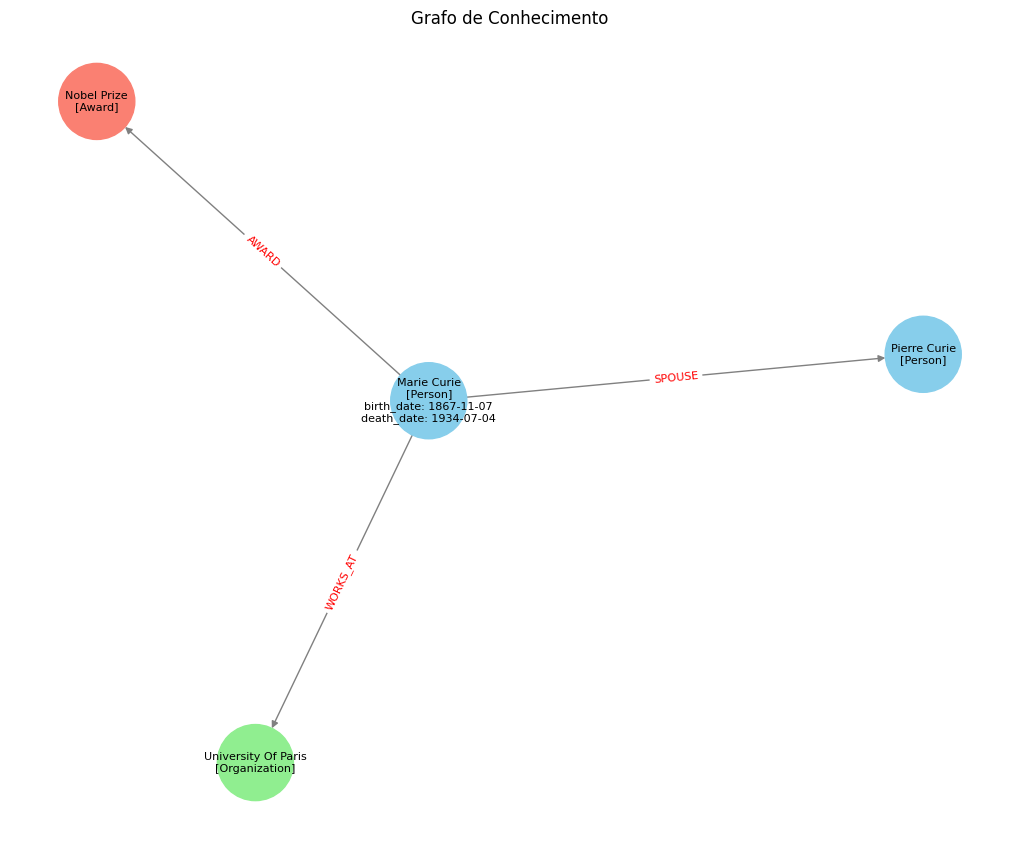

In [ ]:
allowed_nodes = ["Person", "Organization", "Location", "Award", "ResearchField"]
allowed_relationships = [
    ("Person", "SPOUSE", "Person"),
    ("Person", "AWARD", "Award"),
    ("Person", "WORKS_AT", "Organization"),
    ("Organization", "IN_LOCATION", "Location"),
    ("Person", "FIELD_OF_RESEARCH", "ResearchField")
]
node_properties=["birth_date", "death_date"]
relationship_properties=["start_date"]
props_defined = LLMGraphTransformer(
  llm=llm, 
  allowed_nodes=allowed_nodes,
  allowed_relationships=allowed_relationships,
  node_properties=node_properties,
  relationship_properties=relationship_properties,
    strict_mode=False # Permite que o LLM seja criativo e obtenha nós e relacionamentos que não estão mapeados previamente
)
data = await props_defined.aconvert_to_graph_documents(documents)
# graph.add_graph_documents(data) # conexão do Neo4jGraph

print(data)
plot_graph_documents(data, show_node_properties=True)

## Usando o mongo db para armazenar o grafo

In [ ]:
# Inicialize o modelo de idioma

from langchain_openai import OpenAI
from langchain.chat_models import init_chat_model

# model = "gpt-4o"
model="gpt-4o-mini"
chat_model = init_chat_model(model, model_provider="openai", temperature=0)

In [ ]:
# Instancie o armazenamento de gráficos

from langchain_mongodb.graphrag.graph import MongoDBGraphStore
from pymongo.errors import CollectionInvalid

try:
    graph_store = MongoDBGraphStore.from_connection_string(
        connection_string=MONGO_URI,
        database_name=MONGO_DB_NAME,
        collection_name=MONGO_COLLECTION,
        entity_extraction_model=chat_model
    )
except  CollectionInvalid:
    graph_store = MongoDBGraphStore(
        connection_string=MONGO_URI,
        database_name=MONGO_DB_NAME,
        collection_name=MONGO_COLLECTION,
        entity_extraction_model=chat_model
    )

In [ ]:
from langchain.text_splitter import TokenTextSplitter

text_splitter = TokenTextSplitter(chunk_size=1024, chunk_overlap=0)
wikipedia_docs = text_splitter.split_documents(documents)

In [ ]:
graph_store.add_documents(wikipedia_docs)

Targets, types, and attributes do not have the same length for Marie Curie!
Targets, types, and attributes do not have the same length for Pierre Curie!


[BulkWriteResult({'writeErrors': [], 'writeConcernErrors': [], 'nInserted': 0, 'nUpserted': 4, 'nMatched': 0, 'nModified': 0, 'nRemoved': 0, 'upserted': [{'index': 0, '_id': 'Marie Curie'}, {'index': 1, '_id': 'Pierre Curie'}, {'index': 2, '_id': 'University of Paris'}, {'index': 3, '_id': 'Robin Williams'}]}, acknowledged=True)]

In [ ]:
from langchain_core.documents import Document
from langchain_community.graphs.graph_document import GraphDocument
from typing import List

def convert_graphdocument_to_document(graph_documents: List[GraphDocument]) -> List[Document]:
    """
    Converte uma lista de GraphDocument para uma lista de Document do langchain_core.
    Os nós, relacionamentos e propriedades são armazenados no campo 'metadata' de Document.
    """

    documents = []

    for graph_doc in graph_documents:
        # Extraindo o conteúdo da página (page_content)
        page_content = graph_doc.source.page_content

        # Preparando o metadata com nós e relacionamentos
        metadata = {
            "nodes": [],
            "relationships": [],
        }

        # Adicionando os nós
        for node in graph_doc.nodes:
            metadata["nodes"].append({
                "id": node.id,
                "type": node.type,
                "properties": node.properties
            })

        # Adicionando os relacionamentos
        for relationship in graph_doc.relationships:
            metadata["relationships"].append({
                "source": relationship.source.id,
                "target": relationship.target.id,
                "type": relationship.type,
                "properties": relationship.properties
            })

        # Criando o documento com metadata e page_content
        document = Document(
            page_content=page_content,
            metadata=metadata
        )

        # Adicionando o documento à lista
        documents.append(document)

    return documents


In [ ]:
data_documents = convert_graphdocument_to_document(data)
data_documents

[Document(metadata={'nodes': [{'id': 'Marie Curie', 'type': 'Person', 'properties': {'birth_date': '1867-11-07', 'death_date': '1934-07-04'}}, {'id': 'Pierre Curie', 'type': 'Person', 'properties': {}}, {'id': 'University Of Paris', 'type': 'Organization', 'properties': {}}, {'id': 'Nobel Prize', 'type': 'Award', 'properties': {}}], 'relationships': [{'source': 'Marie Curie', 'target': 'Nobel Prize', 'type': 'AWARD', 'properties': {}}, {'source': 'Marie Curie', 'target': 'Pierre Curie', 'type': 'SPOUSE', 'properties': {}}, {'source': 'Marie Curie', 'target': 'University Of Paris', 'type': 'WORKS_AT', 'properties': {'start_date': '1906-01-01'}}]}, page_content='\nMarie Curie, 7 November 1867 – 4 July 1934, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.\nShe was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.\nHer husband, Pi

In [ ]:
graph_store.add_documents(data_documents)

Targets, types, and attributes do not have the same length for Marie Curie!
Targets, types, and attributes do not have the same length for Pierre Curie!


[BulkWriteResult({'writeErrors': [], 'writeConcernErrors': [], 'nInserted': 0, 'nUpserted': 3, 'nMatched': 0, 'nModified': 0, 'nRemoved': 0, 'upserted': [{'index': 0, '_id': 'Marie Curie'}, {'index': 1, '_id': 'Pierre Curie'}, {'index': 2, '_id': 'Robin Williams'}]}, acknowledged=True)]

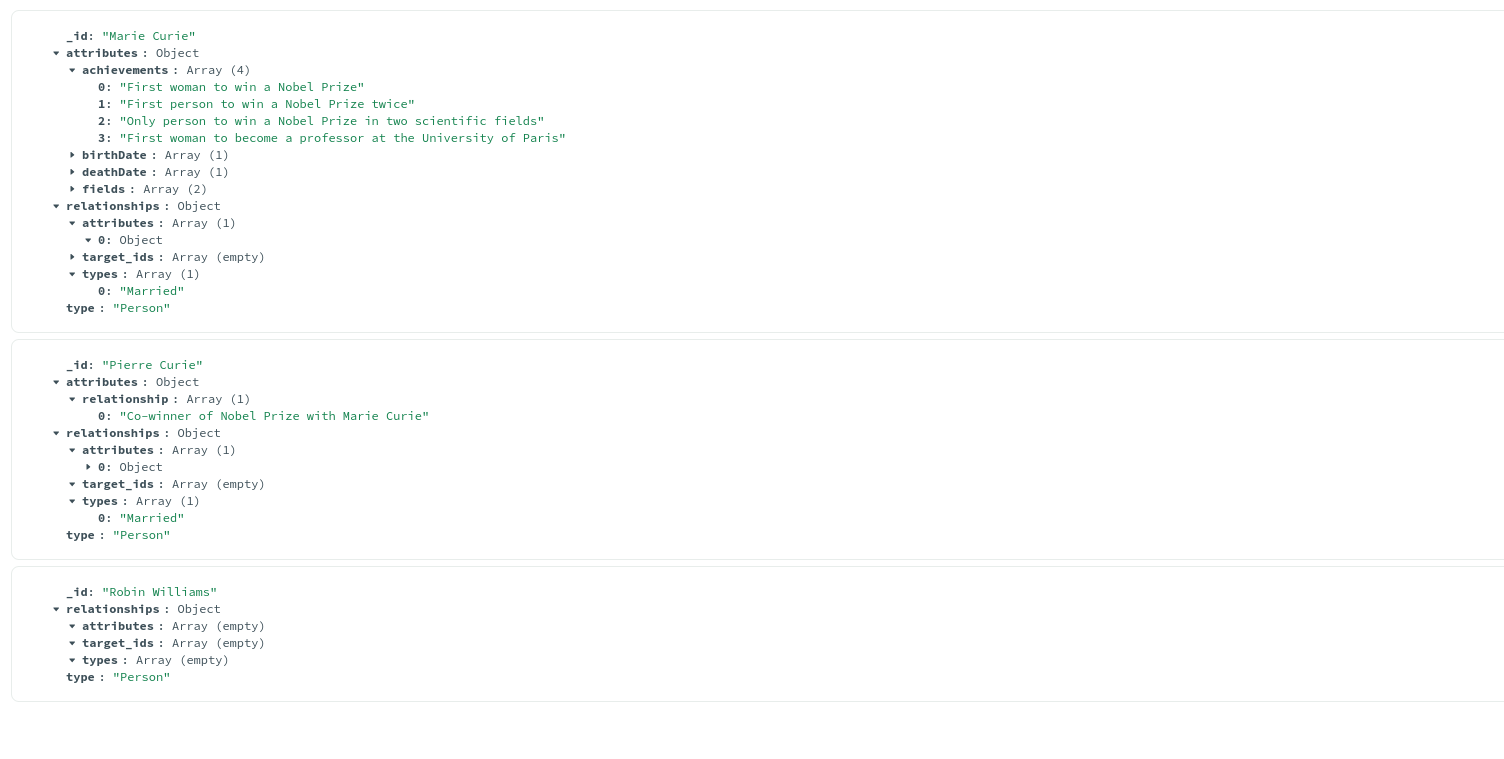

In [ ]:
from pymongo import MongoClient
from typing import List


def create_indexes(mongo_uri: str, db_name: str, collection_name: str = "graph_data"):
    client = MongoClient(mongo_uri)
    db = client[db_name]
    col = db[collection_name]

    # Índices para nós
    col.create_index([("doc_type", 1), ("id", 1)], name="node_id_index", unique=False)
    col.create_index([("type", 1)], name="node_type_index", sparse=True)

    # Índices para arestas
    col.create_index([("doc_type", 1), ("source", 1), ("target", 1), ("type", 1)],
                     name="edge_structure_index", unique=False)

    # Índices de data
    col.create_index("created_at", name="created_at_index")
    col.create_index("updated_at", name="updated_at_index")

    client.close()


def insert_graph_documents_single_collection(graph_documents: List, mongo_uri: str, db_name: str,
                                             collection_name: str = "graph_data"):
    client = MongoClient(mongo_uri)
    db = client[db_name]
    col = db[collection_name]

    for graph_doc in graph_documents:
        page_content = getattr(graph_doc.source, "page_content", None)
        metadata = getattr(graph_doc.source, "metadata", {})

        # Inserir nós
        for node in graph_doc.nodes:
            doc = {
                "_id": f"node::{node.id}",
                "doc_type": "node",
                "id": node.id,
                "type": node.type,
                "properties": node.properties,
                "source": {
                    "page_content": page_content,
                    "metadata": metadata
                }
            }
            col.update_one({"_id": doc["_id"]}, {"$set": doc}, upsert=True)

        # Inserir relacionamentos
        for rel in graph_doc.relationships:
            doc = {
                "_id": f"edge::{rel.source.id}->{rel.target.id}::{rel.type}",
                "doc_type": "edge",
                "source": rel.source.id,
                "target": rel.target.id,
                "type": rel.type,
                "properties": rel.properties,
                "source_document": {
                    "page_content": page_content,
                    "metadata": metadata
                }
            }
            col.update_one({"_id": doc["_id"]}, {"$set": doc}, upsert=True)

    client.close()

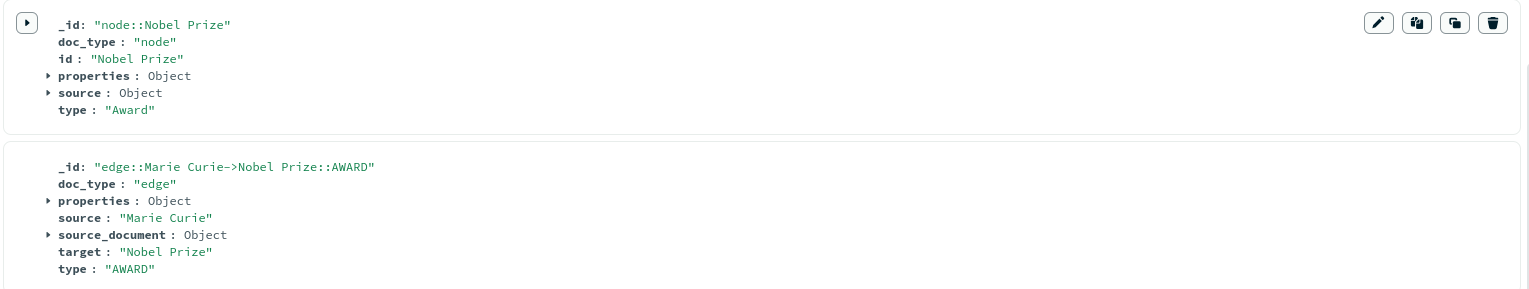

In [ ]:
# Só precisa ser chamada uma vez ao configurar o banco
create_indexes(
    mongo_uri=MONGO_URI,
    db_name=MONGO_DB_NAME,
    collection_name=MONGO_COLLECTION
)

# Pode ser chamada quantas vezes quiser com novos dados
insert_graph_documents_single_collection(
    graph_documents=data,  # sua lista de GraphDocument
    mongo_uri=MONGO_URI,
    db_name=MONGO_DB_NAME,
    collection_name=MONGO_COLLECTION
)

In [ ]:
query = "Quem foi Marie Curie?"
answer = graph_store.chat_response(query)
print(answer.content)

Marie Curie foi uma cientista polonesa naturalizada francesa, conhecida por suas pesquisas pioneiras em radioatividade. Ela foi a primeira mulher a ganhar um Prêmio Nobel e a única pessoa a receber o prêmio em duas áreas científicas diferentes: Física, em 1903, e Química, em 1911. Curie é famosa por suas descobertas dos elementos rádio e polônio, além de suas contribuições significativas para o desenvolvimento da teoria da radioatividade. Sua dedicação à ciência e suas realizações notáveis a tornaram uma figura icônica na história da ciência.


In [ ]:
query = "Quem ganhou o prêmio nobel?"
answer = graph_store.chat_response(query)
print(answer.content)

Não foram encontrados dados relacionados a vencedores do Prêmio Nobel. Para informações atualizadas sobre os ganhadores, recomendo consultar fontes oficiais ou notícias recentes.


In [ ]:
query = "Quem foi casado com Marie Curie?"
answer = graph_store.chat_response(query)
print(answer.content)

Marie Curie foi casada com Pierre Curie. Eles se casaram em 1895 e trabalharam juntos em pesquisas sobre radioatividade.


In [ ]:
# name = "Marie Curie"
# name = "Pierre Curie"
name = "University Of Paris"
graph_store.find_entity_by_name(name)